In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from numpy import load

2023-05-26 14:27:16.968685: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 14:27:38.879622: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 14:27:38.903957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 14:28:15.611064: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#loading training data
X = load("X_train_1.npy", mmap_mode='r')
y = load("Y_train_1.npy", mmap_mode='r')

In [3]:
#model graph
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2)) 
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

2023-05-26 14:29:05.379556: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [4]:
model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"] )

In [5]:
model_hist = model.fit(X, y, epochs = 10, validation_split = 0.1)

2023-05-26 14:30:29.524177: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1944000000 exceeds 10% of free system memory.


Epoch 1/10
352/352 [==============================] - 404s 1s/step - loss: 1.2383 - accuracy: 0.5518 - val_loss: 10.9688 - val_accuracy: 0.5032
Epoch 2/10
352/352 [==============================] - 407s 1s/step - loss: 0.6540 - accuracy: 0.5738 - val_loss: 0.6806 - val_accuracy: 0.5408
Epoch 3/10
352/352 [==============================] - 12944s 37s/step - loss: 0.6352 - accuracy: 0.6160 - val_loss: 13.7559 - val_accuracy: 0.5136
Epoch 4/10
352/352 [==============================] - 375s 1s/step - loss: 0.6182 - accuracy: 0.6377 - val_loss: 1.3268 - val_accuracy: 0.6240
Epoch 5/10
352/352 [==============================] - 383s 1s/step - loss: 0.6084 - accuracy: 0.6461 - val_loss: 0.5804 - val_accuracy: 0.6888
Epoch 6/10
352/352 [==============================] - 369s 1s/step - loss: 0.5946 - accuracy: 0.6603 - val_loss: 0.6174 - val_accuracy: 0.6824
Epoch 7/10
352/352 [==============================] - 380s 1s/step - loss: 0.5817 - accuracy: 0.6712 - val_loss: 0.6176 - val_accuracy: 0

In [6]:
import matplotlib.pyplot as plt

def model_diagnostic_plot(history,loss=False,accuracy=False):
    if loss:# plot loss
        plt.figure(figsize=(10,5))
        plt.subplot(211)
        plt.title('Training and validation Loss')
        plt.plot(history.history['loss'], color='blue', label='train')
        plt.plot(history.history['val_loss'], color='orange', label='test')
        plt.legend()
        plt.show()
    if accuracy: # plot accuracy
        plt.figure(figsize=(10,5))
        plt.subplot(212)
        plt.title('Training and validation Accuracy')
        plt.plot(history.history['accuracy'], color='blue', label='train')
        plt.plot(history.history['val_accuracy'], color='orange', label='test')
        plt.legend()
        plt.show()

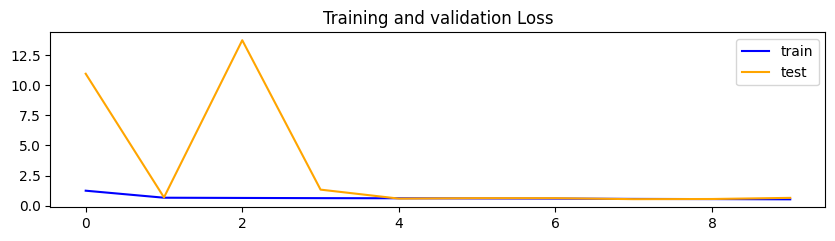

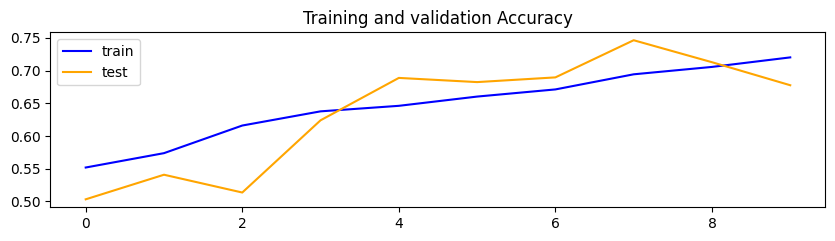

In [7]:
model_diagnostic_plot(model_hist,loss=True, accuracy=True)

In [8]:
model.save("/home/mwaniki-new/Documents/deep_learning/Cats_Dogs/src/Model/model.h5")